# Exercise 1

## Fundamentals of Simulation Methods

#### Author:    Elias Olofsson

#### Version information:
        2020-11-20: v.1.0. First public release. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1.1 - Data creation and Visualization (7 pts)

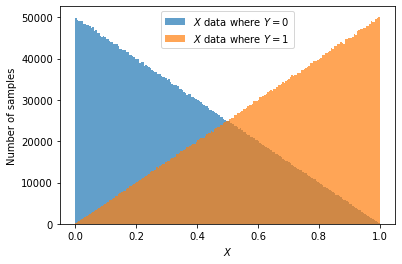

In [2]:
def inversion_y0(x):
    return 1-np.sqrt(1-x)
    
def inversion_y1(x):
    return np.sqrt(x)

# Generate N pairs of feature data X and labels Y.
def create_data(N):
    # Generate random labels {0,1} with equal probability.
    y = np.random.randint(2, size=N)
    
    # Draw random numbers from the standard flat distribution on [0,1].
    x_rand = np.random.random(N)
    
    # Preallocate array for X data.
    x = np.zeros_like(x_rand)
    
    # Filter out values where Y == 0 or 1, and apply the corresponding analytical
    # probability inversion to transfer values into each new distribution.
    x[y==0] = inversion_y0(x_rand[y==0])
    x[y==1] = inversion_y1(x_rand[y==1])

    return np.concatenate([[x], [y]]).T

# Test that the create_data() function works correctly.
N = 10**7
data = create_data(N)
mask_y0 = data[:,1]==0
mask_y1 = data[:,1]==1
plt.hist(data[mask_y0,0], bins=200, alpha=0.7, label="$X$ data where $Y = 0$")
plt.hist(data[mask_y1,0], bins=200, alpha=0.7, label="$X$ data where $Y = 1$")
plt.legend()
plt.xlabel("$X$")
plt.ylabel("Number of samples")
plt.savefig("data_creation.pdf", format='pdf', bbox_inches='tight')

## Exercise 1.2 - Classification by Thresholding (5 pts)

Experimentally testing the predicted error rates for the set thresholds, sample sizes and classification rules. 
    Currently averaging over 10 datasets for each sample size.


Rule A:
    Threshold: 0.2
        Sample size: 10
        Avg error rate: 0.32  , Std: 0.14  

        Sample size: 100
        Avg error rate: 0.327 , Std: 0.05061

        Sample size: 1000
        Avg error rate: 0.333 , Std: 0.01153

        Sample size: 10000
        Avg error rate: 0.3405, Std: 0.002926

    Threshold: 0.5
        Sample size: 10
        Avg error rate: 0.26  , Std: 0.1428

        Sample size: 100
        Avg error rate: 0.246 , Std: 0.04903

        Sample size: 1000
        Avg error rate: 0.2485, Std: 0.007228

        Sample size: 10000
        Avg error rate: 0.2508, Std: 0.00312

    Threshold: 0.6
        Sample size: 10
        Avg error rate: 0.4   , Std: 0.08944

        Sample size: 100
        Avg error rate: 0.292 , Std: 0.01887

        Sample size: 1000
        Avg error 

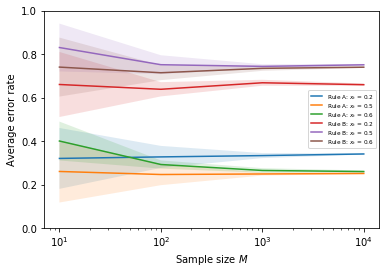

In [3]:
# Defining threshold classifiers A and B
def ruleA(x,t):
    predict = np.zeros_like(x)
    predict[x<t] = 0
    predict[x>=t] = 1
    return predict

def ruleB(x,t):
    return 1-ruleA(x,t)

# Calculate the error rate for the given data, classification rule and threshold.
def error_test(data,rulefunc,threshold):
    # Get 
    y_predicted = rulefunc(data[:,0], threshold)

    correct_predictions =  sum(y_predicted == data[:,1])
    samplesize = np.size(data, axis=0)
    error_rate = 1 - correct_predictions/samplesize
    
    return error_rate

# Function to experimentally test a set of classification rules given sets of various parameters.
def exp_test(M,N,Thresholds,rule_list,filename):
    # Preallocations
    error = np.zeros(N)
    avg_err = np.zeros(len(M))
    std_err = np.zeros(len(M))

    print(f"""Experimentally testing the predicted error rates for the set thresholds, sample sizes and classification rules. 
    Currently averaging over {N} datasets for each sample size.\n\n""")
    # Test each rule in list
    for rule_func in rule_list:
        fname = rule_func.__name__
        print(f"Rule {fname[-1]}:")
        
        # Test each threshold
        for xt in Thresholds:
            print(f"    Threshold: {xt}")
            
            # Test each sample size
            for i,m in enumerate(M):
                print(f"        Sample size: {m}")
                
                # Repeat test N times for each sample size
                for j in range(N):
                    data = create_data(m)
                    error[j] = error_test(data,rule_func,xt)
                
                avg_err[i] = np.average(error)
                std_err[i] = np.std(error)
                print(f"        Avg error rate: {avg_err[i]:<6.4}, Std: {std_err[i]:<6.4}\n")
            
            # Plot the average error, plus/minus one standard deviation of the error.
            plt.plot(M, avg_err, label=f"Rule {fname[-1]}: $x_t$ = {xt}")
            plt.fill_between(M, (avg_err-std_err), (avg_err+std_err), alpha=0.15)
            # Settings and labeling
            plt.xscale('log')
            if (fname[-1] == 'A') or (fname[-1] == 'B'):
                locstr = 'center right'
            else:
                locstr = 'best'
            plt.legend(loc=f'{locstr}',fontsize='xx-small', labelspacing=0.01)
            plt.xlabel('Sample size $M$')
            plt.ylabel('Average error rate')
            plt.ylim((0,1))
    # Saving the figure
    plt.savefig(f"{filename}.pdf", format='pdf', bbox_inches='tight')


# Settings
M = [10, 100, 1000, 10000]      # Sample sizes
N = 10                          # No. of tests per sample size.
Thresholds = [0.2, 0.5, 0.6]    # Thresholds to test.
rule_list = [ruleA, ruleB]      # Specifiy the rules to use.

# Execute the test
exp_test(M,N,Thresholds,rule_list,'avg_error_ruleAB')


## Exercise 1.3 - Baseline Classifiers (2 pts)

Experimentally testing the predicted error rates for the set thresholds, sample sizes and classification rules. 
    Currently averaging over 10 datasets for each sample size.


Rule C:
    Threshold: None
        Sample size: 10
        Avg error rate: 0.52  , Std: 0.1166

        Sample size: 100
        Avg error rate: 0.514 , Std: 0.08789

        Sample size: 1000
        Avg error rate: 0.5041, Std: 0.01506

        Sample size: 10000
        Avg error rate: 0.4989, Std: 0.004106

Rule D:
    Threshold: None
        Sample size: 10
        Avg error rate: 0.46  , Std: 0.201 

        Sample size: 100
        Avg error rate: 0.525 , Std: 0.05937

        Sample size: 1000
        Avg error rate: 0.4935, Std: 0.01611

        Sample size: 10000
        Avg error rate: 0.5015, Std: 0.004048



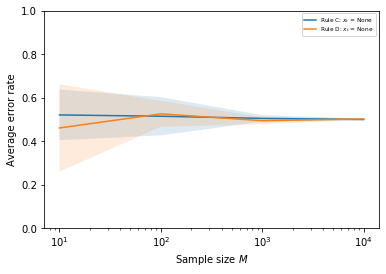

In [4]:
def ruleC(x, threshold):
    predict = np.random.randint(2, size=x.shape)
    return predict

def ruleD(x, threshold):
    predict = np.ones(x.shape)
    return predict

#Settings
M = [10, 100, 1000, 10000]  # Sample sizes
N = 10                      # No. of tests per sample size.
Thresholds = [None]         # Thresholds to test. (Not utilized for Rule C and D)
rule_list = [ruleC, ruleD]  # Specifiy the rules to use.

# Executing the test
exp_test(M,N,Thresholds,rule_list, 'avg_error_ruleCD')

## Exercise 1.4 - Nearest Neighbour Classification (6 pts)